In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [1]:
import sys ; sys.path += ['../']

from Pycode.Data_Aquisition import get_crypto_data
from Pycode.Features_Engineering import *
from Pycode.train_XGB import *

**TABLE OF CONTENT**
* [Data Pipeline](#data-bullet)
* [XGBoost](#xgb_run-bullet)

## Data Pipeline<a class="anchor" id="data-bullet"></a>

In [ ]:
# Params
n_batch_obs=4
currency = 'EUR'
exchange = 'Coinbase'
n_best = 400
n_val=60

# Get data from API
df = get_crypto_data(n_batch_obs=n_batch_obs,  currency=currency, exchange=exchange)

# Create the features dataset
feats_df = features_engineering(df)

# Create the target series
target, class_weights = target_engineering(df)

# Select Kbest features
kbest_selector, kbest_df = features_selection(feats_df, target, n_best)



# Prepare the data for XGB Trainng
df_train_scaled, df_val_scaled, target_train, target_val = XGB_Data_Preparation(kbest_df, target, n_val=n_val)



- EUR/BTC Prices from 1590883200 to 1598083200 
- EUR/BTC Prices from 1583683200 to 1590883200 
- EUR/BTC Prices from 1576483200 to 1583683200 
- EUR/BTC Prices from 1569283200 to 1576483200 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-24 00:00:00 to 2020-08-22 08:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-24 00:00:00 to 2020-08-22 08:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
None
<cl

../Pycode/Features_Engineering.py:66: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat)
../Pycode/Features_Engineering.py:67: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H.diff'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat).diff()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-24 00:00:00 to 2020-08-22 08:00:00
Columns: 858 entries, volumefrom to volumeto_mov24H.MSum24H.diff
dtypes: float64(858)
memory usage: 52.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-24 00:00:00 to 2020-08-22 08:00:00
Columns: 1716 entries, volumefrom to volumeto_mov24H.MSum24H.diff.Squared
dtypes: float64(1716)
memory usage: 104.8 MB
BTC Price.PSARs_0.02_0.2                 4098
BTC Price.SUPERTl_7_3.0                  4050
BTC Price.SUPERTs_7_3.0                  3956
BTC Price.PSARl_0.02_0.2                 3904
BTC Price.ISB_26                           77
BTC Price.EOM_14_100000000                 56
BTC Price.KSTs_9                           52
BTC Price.ISA_9                            51
BTC Price.KST_10_15_20_30_10_10_10_15      44
BTC Price.TRIXs_30_9                       38
BTC Price.MASSI_9_25                       32
BTC Price.TRIX_30_9                       

## Run the XGB pipeline<a class="anchor" id="xgb_run-bullet"></a>
### Open to Close Trading Signal

(17,) (1318,) (1391,)
Observation removed: 14 for positive, 14 for negative


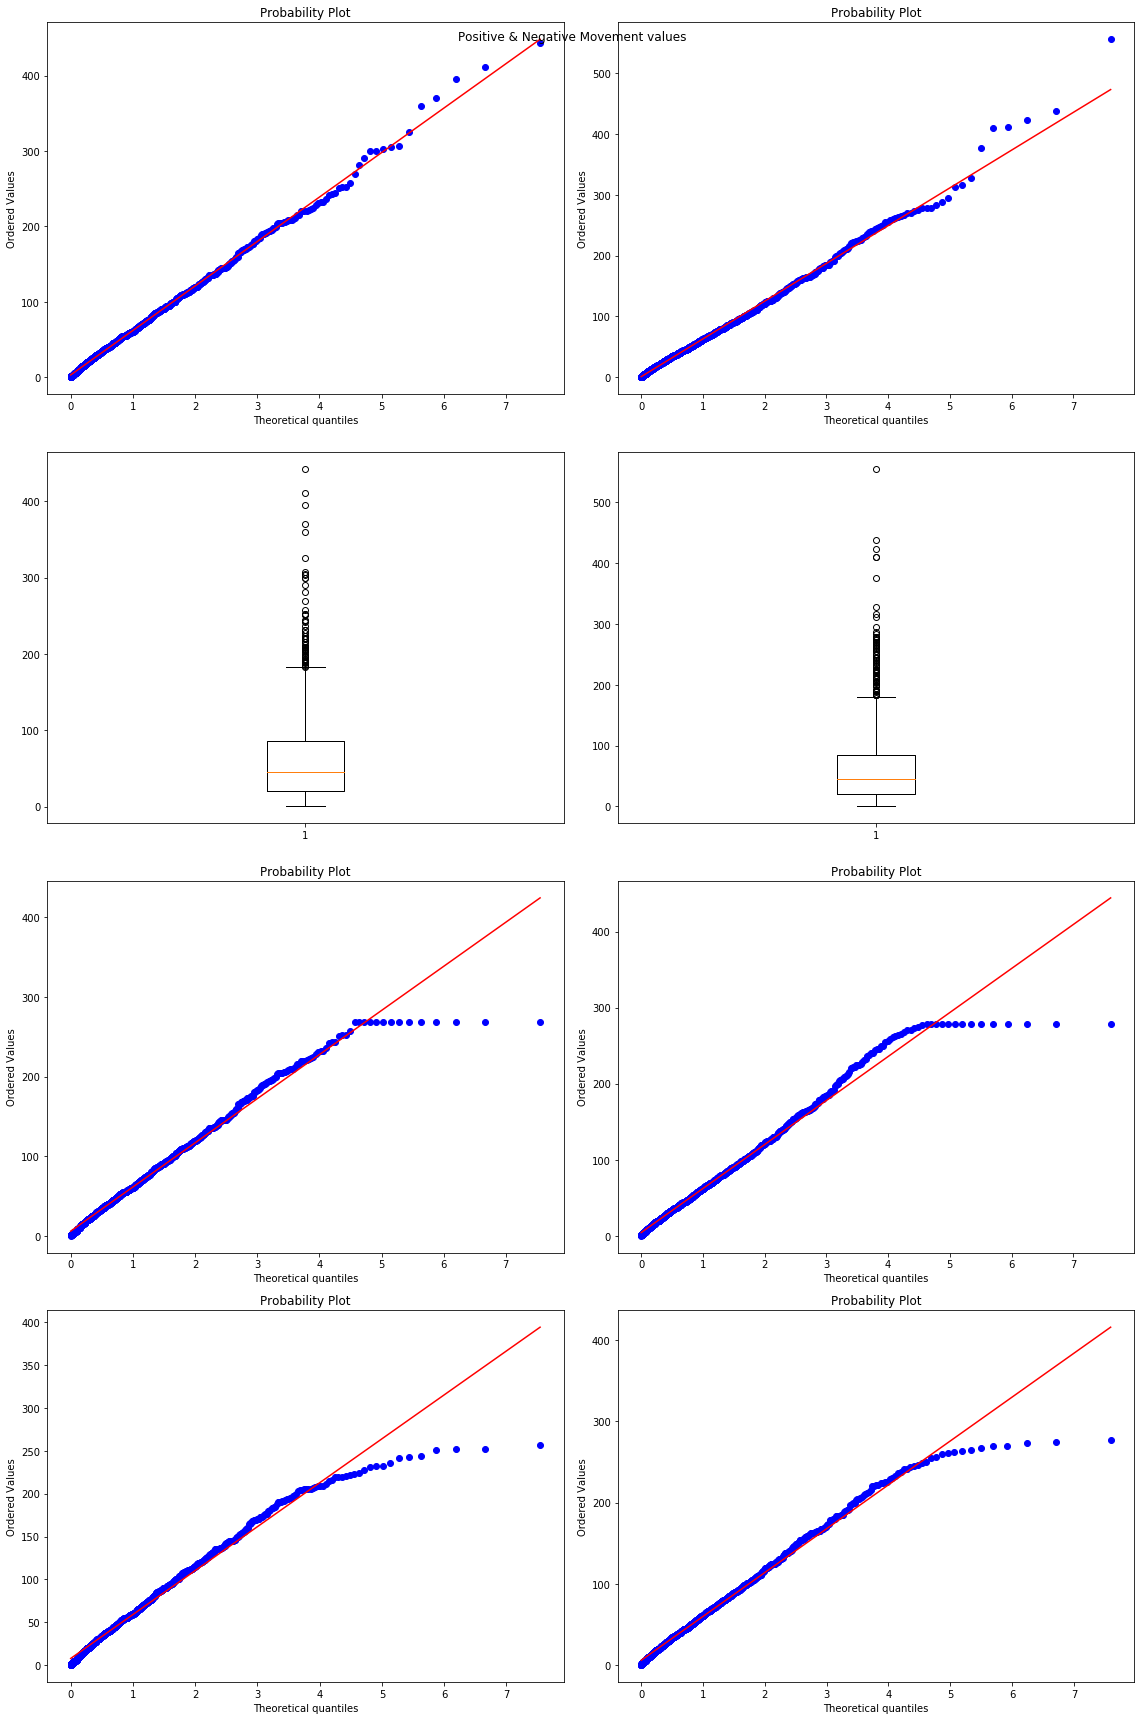

> Normal test p-values for close price movement: 216.7778556445756
> Normal test p-values for trading signal: 201.3867542263029
1318 1318
1391 1390
17 17
- 0 NaNs in the loaded dataframe
- 0 NaNs in the dataset (features & target)
(2126, 10092) (2126,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2126 entries, 2011-01-11 to 2020-05-18
Columns: 10092 entries, SHFE 3M to LME Copper.Z_30.Mov.lag5
dtypes: bool(2), float64(10073), int64(7), object(10)
memory usage: 163.7+ MB
None
(2126, 10092) (2066, 10092) (60, 10092)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(2066, 400) (60, 400)
DatetimeIndex(['2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14',
               '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21',
               '2011-01-24', '2011-01-25',
               ...
               '2020-01-21', '2020-01-22', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
               '2020-02-11', '2020-02-12'],
              dtype='datetime64[ns]', length=2066, freq=None)
DatetimeIndex(['2020-02-13', '2020-02-14', '2020-02-18', '2020-02-19',
               '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-03-02',
               '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', 

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[500]	train-ng_loss:212.42	test-ng_loss:16.2248

* 28/100: (0.2179, 0.7168, 0.3426)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[749]	train-ng_loss:250.354	test-ng_loss:19.088

* 29/100: (0.2595, 0.0932, 0.2595)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[737]	train-ng_loss:494.619	test-ng_loss:45.1841

* 30/100: (0.5089, 0.4674, 0.1347)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[999]	train-ng_loss:229.181	test-ng_loss:26.5606

* 31/100: (0.8, 0.0932, 0.01)
Multiple eval metrics have been passed: 'test-ng_los

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[1063]	train-ng_loss:224.852	test-ng_loss:24.9624

* 62/100: (0.5921, 0.3011, 0.3011)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[560]	train-ng_loss:328.466	test-ng_loss:30.1226

* 63/100: (0.0932, 0.3842, 0.2595)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[886]	train-ng_loss:337.817	test-ng_loss:27.6779

* 64/100: (0.0932, 0.0516, 0.5505)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[860]	train-ng_loss:460.587	test-ng_loss:39.3411

* 65/100: (0.01, 0.01, 0.0516)
Multiple eval metrics have been passed: 'test-ng

In [ ]:
# params
n_test = 200
n_tune = 100 # number of combinations to try during tuning


# Tuning for Close-Close Trading Signal
tuning_df = XGB_Tuning_Pipeline(df_train_scaled, df_val_scaled, target_train, target_val,
                                n_test=n_test, n_tune=n_tune)

# Get best params
best_params = tuning_df.iloc[0, 0]
print('Best parameters: {}'.format(best_params))

# Validation of the tuned model
df_backtest = XGB_Eval_Pipeline(best_params, 
                                df, target_name, df_train, df_val, target_train, target_val, 
                                n_test=n_test, _plot=True)

